<a href="https://colab.research.google.com/github/aserdargun/DSML101/blob/main/tensorflow/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to fit

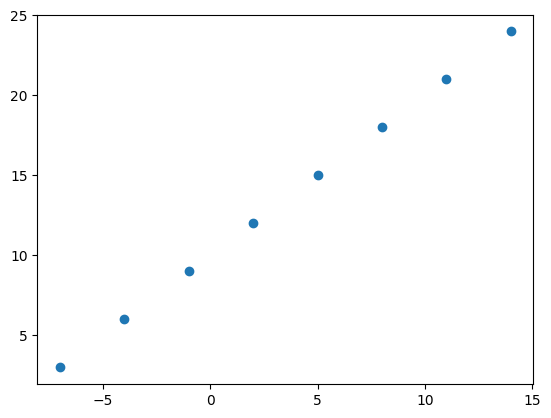

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is)
and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

```
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
...

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))
```

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 553ms/step - loss: 9.6531 - mae: 9.6531
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 9.5206 - mae: 9.5206
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 9.3881 - mae: 9.3881
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 9.2556 - mae: 9.2556
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 9.1231 - mae: 9.1231


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 171ms/step


array([[21.709871]], dtype=float32)

In [ ]:
y_pred + 11

array([[32.70987]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 552ms/step - loss: 8.9207 - mae: 8.9207
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7882 - mae: 8.7882
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6557 - mae: 8.6557
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.5232 - mae: 8.5232
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3907 - mae: 8.3907
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.2582 - mae: 8.2582
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1257 - mae: 8.1257
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9932 - mae: 7.9932
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8607 - mae: 7.8607
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 7.7282 - mae: 7.7282
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our models's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 253ms/step


array([[30.162481]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 14.1804 - mae: 14.1804
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 13.4949 - mae: 13.4949
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8126 - mae: 12.8126
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 12.1321 - mae: 12.1321
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 11.4518 - mae: 11.4518
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 10.7695 - mae: 10.7695
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 10.0831 - mae: 10.0831
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 9.3902 - mae: 9.3902
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 8.6888 - mae: 8.6888
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 7.9766 - mae: 7.9766
Epoch 11/100
1/1 [==============================] - 0s 23

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 248ms/step


array([[27.087973]], dtype=float32)

## Evaluating a model

In practive, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training o a model - how does a model perform while it learns?
* The predictions of the model line up against the ground truth (the original labels)

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

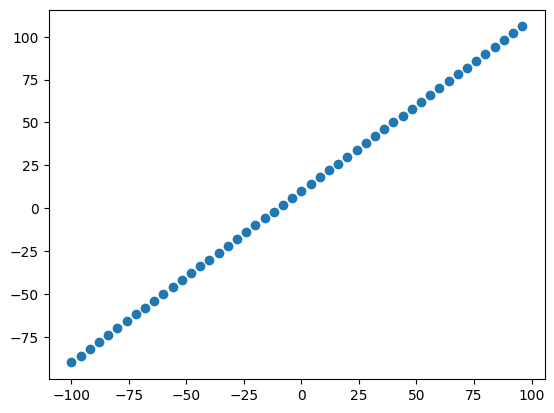

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you habe available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data aailable.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Splt the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are t esting samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising the data

Now we've got our data in training and test sets... let's visualize it again!

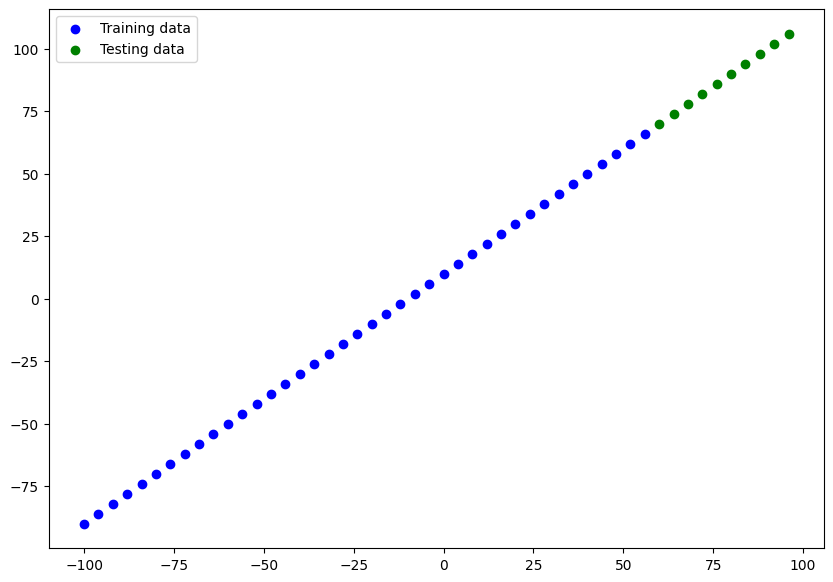

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 101.8222 - mae: 101.8222
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 66.3668 - mae: 66.3668
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 29.0879 - mae: 29.0879
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 10.3850 - mae: 10.3850
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 11.4135 - mae: 11.4135
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5308 - mae: 10.5308
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 9.4943 - mae: 9.4943
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.3556 - mae: 9.3556
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 7.5410 - mae: 7.5410
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 12.6197 - mae: 12.6197
Epoch 11/100
2/2 [==============================] - 0s

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.build()

In [ ]:
X[0].shape

TensorShape([])

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1.  Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring parameters from other models during **transfer learning**).

📚 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's deep learning video.

⚒ **Exercise:** Try plaiyng around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


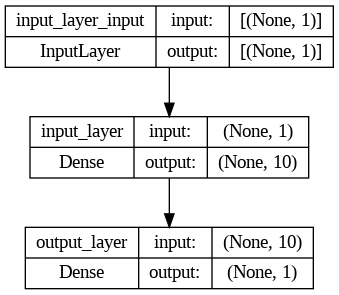

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot theam against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 343ms/step


array([[ 76.025856],
       [ 80.97686 ],
       [ 85.92785 ],
       [ 90.87886 ],
       [ 95.82984 ],
       [100.780846],
       [105.73185 ],
       [110.68284 ],
       [115.63384 ],
       [120.58483 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

⌨ **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good ideo to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend()

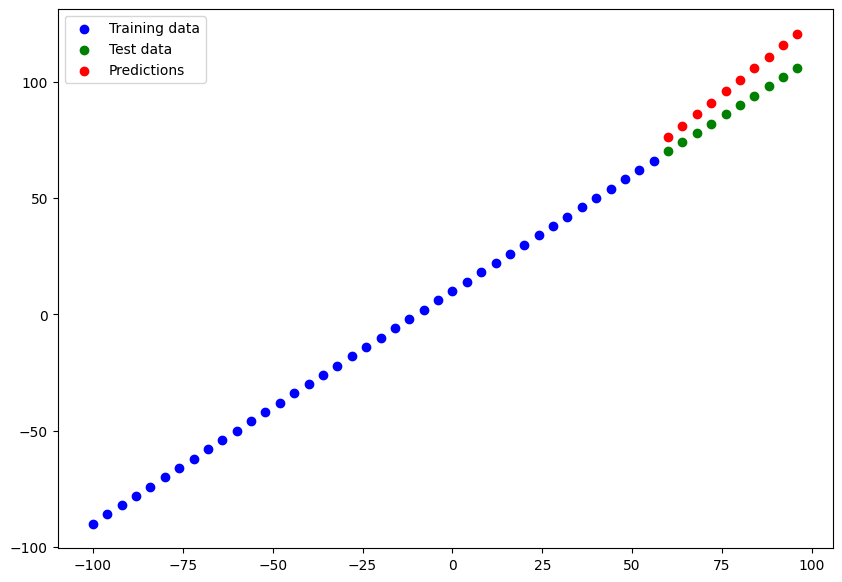

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metric

Depending o the problem you're working on, there will be diferent evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wring is each o my model's predictions"
* MSE - mean square error, "square the average errors"


In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 574ms/step - loss: 10.3053 - mae: 10.3053


[10.30534839630127, 10.30534839630127]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.584486, 11.209256, 10.01443 , 10.175772, 11.531937, 14.068507,
       17.78548 , 22.682838, 27.633844, 32.58483 ], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.025856],
       [ 80.97686 ],
       [ 85.92785 ],
       [ 90.87886 ],
       [ 95.82984 ],
       [100.780846],
       [105.73185 ],
       [110.68284 ],
       [115.63384 ],
       [120.58483 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.025856,  80.97686 ,  85.92785 ,  90.87886 ,  95.82984 ,
       100.780846, 105.73185 , 110.68284 , 115.63384 , 120.58483 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.305347>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=113.66145>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

### Running experimetns to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 34ms/step - loss: 100.8349 - mae: 100.8349
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 65.3794 - mae: 65.3794
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 28.1466 - mae: 28.1466
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 10.7172 - mae: 10.7172
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 11.7965 - mae: 11.7965
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 10.9141 - mae: 10.9141
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.7299 - mae: 8.7299
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 7.7677 - mae: 7.7677
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 19.9833 - mae: 19.9833
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 13.7379 - mae: 13.7379
Epoch 11/100
2/2 [==============================] -

1/1 [==============================] - 0s 264ms/step


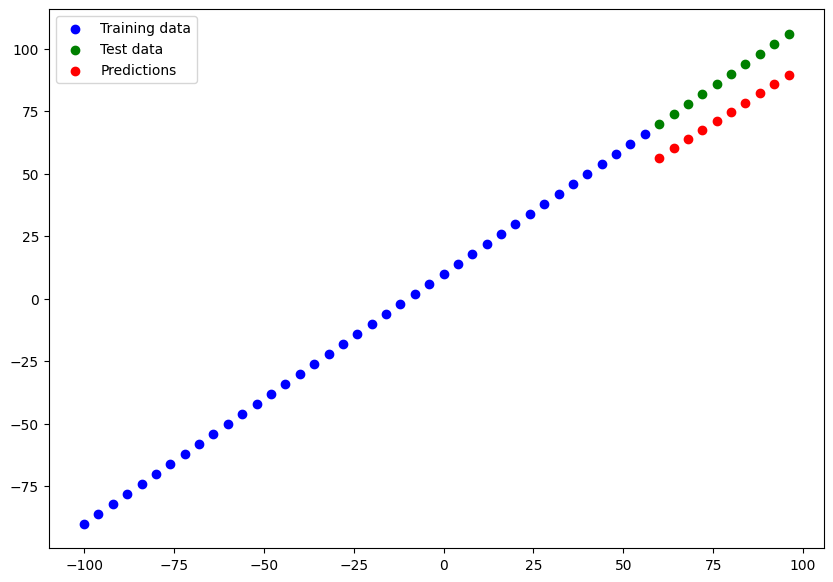

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[56.437347],
        [60.115585],
        [63.793823],
        [67.47206 ],
        [71.15031 ],
        [74.828545],
        [78.50678 ],
        [82.18503 ],
        [85.863266],
        [89.541504]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([56.437347, 60.115585, 63.793823, 67.47206 , 71.15031 , 74.828545,
        78.50678 , 82.18503 , 85.863266, 89.541504], dtype=float32)>)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=15.010574>,
 <tf.Tensor: shape=(), dtype=float32, numpy=226.17148>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 23ms/step - loss: 63.7510 - mse: 6208.8252
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.9265 - mse: 968.7299
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 18.1272 - mse: 480.1105
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.3192 - mse: 235.8876
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 14.7354 - mse: 270.1627
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.7458 - mse: 161.5354
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 12.8249 - mse: 224.6115
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1007 - mse: 156.8317
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 40.3417 - mse: 2563.5862
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 27.7504 - mse: 1084.7423
Epoch 11/100
2/2 [======================

1/1 [==============================] - 0s 198ms/step


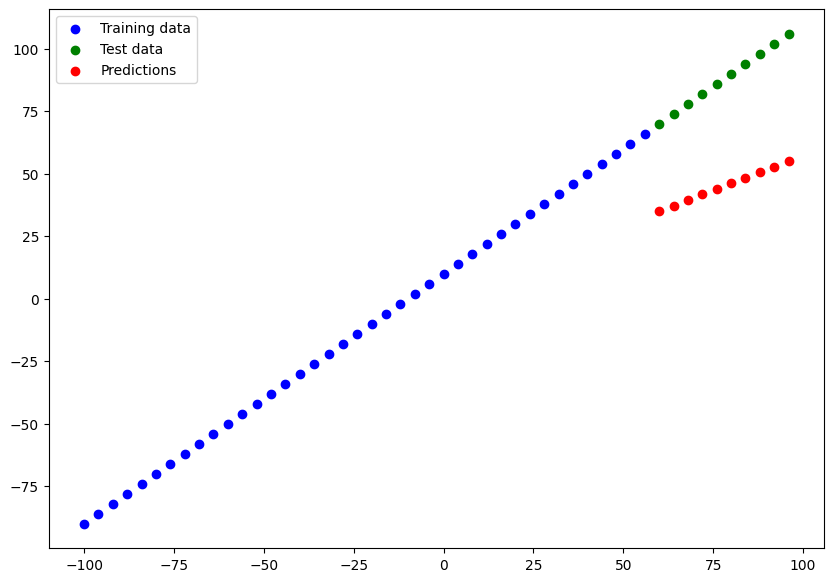

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_' evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=42.93093>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1868.6774>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 15ms/step - loss: 32.7582 - mae: 32.7582
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 24.4950 - mae: 24.4950
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 30.0301 - mae: 30.0301
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 26.2052 - mae: 26.2052
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 14.3726 - mae: 14.3726
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.4667 - mae: 11.4667
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 12.4972 - mae: 12.4972
Epoch 8/500
2/2 [==============================] - 0s 16ms/step - loss: 10.9718 - mae: 10.9718
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 39.0458 - mae: 39.0458
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 26.6231 - mae: 26.6231
Epoch 11/500
2/2 [==============================] - 

1/1 [==============================] - 0s 101ms/step


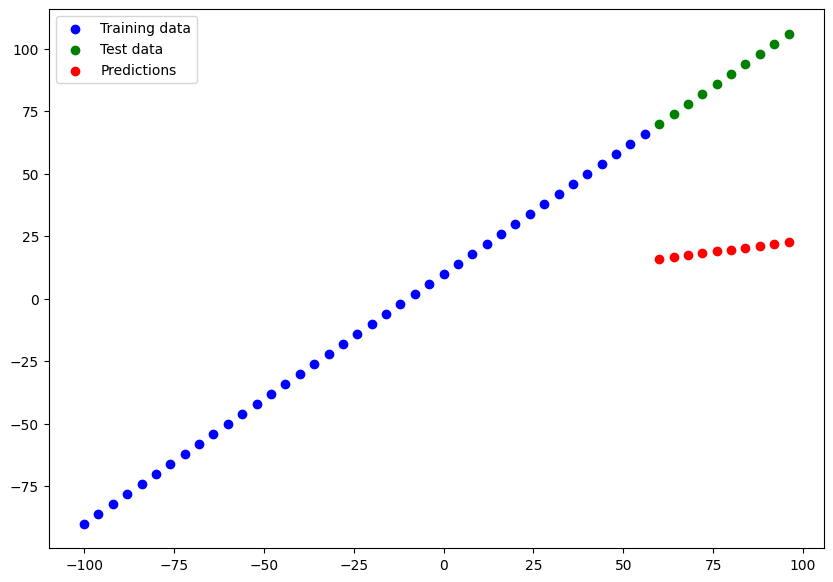

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.699646>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4806.1104>)

⌨ **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,15.010574,226.171478
1,model_2,42.930931,1868.677368
2,model_3,68.699646,4806.110352


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> ⌨ **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📚 **Resource:** As you build more models, you'll want to look into using:

* TensorBorad - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel_format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 79ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Compare the MAEof model_2 preds and loaded SavedModel
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 75ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 '/content/drive/MyDrive/Colab Notebooks'

In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks'

 00_tensorflow_fundamentals_exercises.ipynb
 00_tensorflow_fundamentals.ipynb
 01_neural_network_regression_with_tensorflow.ipynb
'09 Neural Nets - Pretrained Image Classification.ipynb'
 best_model_HDF5_format.h5
 Part-1-Section-02-A_Quick_Refresher.ipynb
 Part-1-Section-03-Variables_and_Memory.ipynb
 Part-1-Section-04-Numeric_Types.ipynb
 Part-1-Section-05-Function_Parameters.ipynb
 Part-1-Section-06-First-Class_Functions.ipynb
 Part-1-Section-07-Scopes_Closures_and_Decorators.ipynb
 Part-1-Section-08-Tuples_as_Data_Structures_and_Named_Tuples.ipynb
 Part-1-Section-09-Modules_Packages_and_Namespaces.ipynb


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8703.8096 - mae: 8703.8096
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7884.5718 - mae: 7884.5718
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7574.7246 - mae: 7574.7246
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7676.6416 - mae: 7676.6416
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7735.5396 - mae: 7735.5396
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7611.2822 - mae: 7611.2822
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7567.4492 - mae: 7567.4492
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7794.8916 - mae: 7794.8916
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7622.1426 - mae: 7622.1426
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7708.0601 - mae: 7708.0601

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 4ms/step - loss: 8957.3232 - mae: 8957.3232


[8957.3232421875, 8957.3232421875]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13293.8438 - mae: 13293.8438
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13136.9375 - mae: 13136.9375
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12813.9639 - mae: 12813.9639
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12169.5615 - mae: 12169.5615
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11062.3857 - mae: 11062.3857
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9606.8633 - mae: 9606.8633
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8243.5059 - mae: 8243.5059
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7553.0244 - mae: 7553.0244
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7434.3096 - mae: 7434.3096
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7413.0591 - mae:

In [ ]:
# Evalueate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4858.8594 - mae: 4858.8594


[4858.859375, 4858.859375]

In [ ]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13293.7773 - mae: 13293.7773
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13123.1016 - mae: 13123.1016
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12763.5283 - mae: 12763.5283
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 12052.9443 - mae: 12052.9443
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 10875.0820 - mae: 10875.0820
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 9403.7236 - mae: 9403.7236
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 8098.1562 - mae: 8098.1562
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7511.6558 - mae: 7511.6558
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7422.2397 - mae: 7422.2397
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 7402.0981 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3482.9177 - mae: 3482.9177


[3482.917724609375, 3482.917724609375]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8957.3232 - mae: 8957.3232


[8957.3232421875, 8957.3232421875]

Text(0.5, 0, 'epochs')

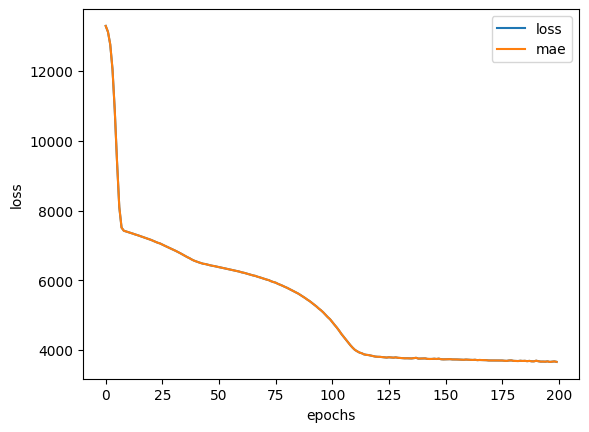

In [ ]:
# Plot histroy (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> ❓**Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people havve asked this question before... so TensorFlow has a solution! It's called the [Early Stopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the columns transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model on our normalized data.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13343.3057 - mae: 13343.3057
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.1748 - mae: 13333.1748
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13309.0088 - mae: 13309.0088
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13259.7949 - mae: 13259.7949
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13173.9961 - mae: 13173.9961
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13040.5986 - mae: 13040.5986
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12849.3945 - mae: 12849.3945
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12590.4365 - mae: 12590.4365
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12253.7100 - mae: 12253.7100
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11837.66

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 3ms/step - loss: 3436.0471 - mae: 3436.0471


[3436.047119140625, 3436.047119140625]

In [ ]:
# Insurance model 2
# 9/9 [==============================] - 0s 2ms/step - loss: 4858.8594 - mae: 4858.8594 [4858.859375, 4858.859375]

In [ ]:
insurance_model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               1200      
                                                                 
 dense_31 (Dense)            (None, 10)                1010      
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


<Axes: ylabel='Frequency'>

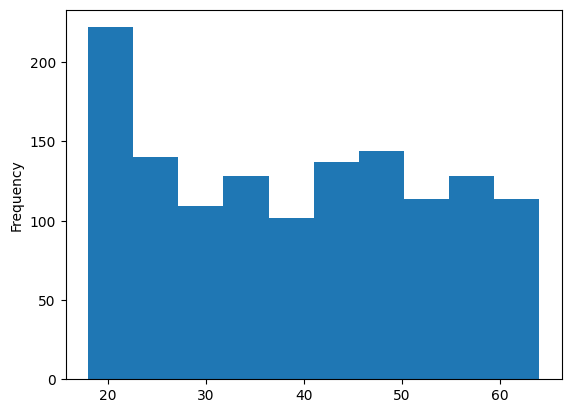

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

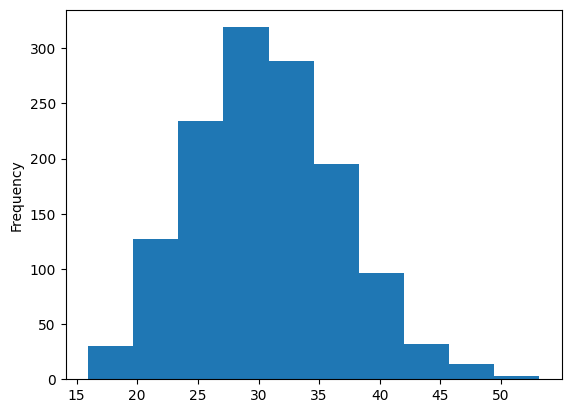

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
